In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plots
mpl.rcParams['figure.dpi'] = 300
results_dir = './../../results'

In [50]:
# Plotter for the Netherlands and Sao Paulo
def plot(region, include_model=True, figsize=(20,17)):
    best = "20200520_031639" if region == "saopaulo" else "20200519_043353"
    p = "{}/{}/distance-metrics.csv".format(results_dir, region + '-' + best)
    p_base = "{}/{}/distance-metrics.csv".format(results_dir, region+'-'+'baseline')
    p_base_24 = "{}/{}/distance-metrics.csv".format(results_dir, region+'-'+'baseline-24')
    dms = pd.read_csv(p).set_index(['distance'])
    dms_base = pd.read_csv(p_base).set_index(['distance'])
    dms_base_24 = pd.read_csv(p_base_24).set_index(['distance'])
    
    dms = dms.join(dms_base['model_sum'], rsuffix='_baseline')
    dms = dms.join(dms_base_24['model_sum'], rsuffix='_baseline_24')
    dms = dms[['groundtruth_sum', 'model_sum', 'model_sum_baseline', 'model_sum_baseline_24']]
    dms.index = pd.IntervalIndex.from_tuples([tuple(list(map(float, idx.replace('(', '').replace(']', '').split(",")))) for idx in dms.index])
    sqrerr = np.square(np.subtract(dms['groundtruth_sum'], dms['model_sum_baseline_24']))
    print("MSE: {:.5e}".format(sqrerr.mean()))
    
    ticks = [2, 3, 5, 10, 20, 50, 100] if region == "saopaulo" else [10, 20, 50, 100, 338]
    mpl.rcParams['font.size'] = 20.0
    fig, ax = plt.subplots(1,1, figsize=figsize, sharex=True)
    
    dsums = [
            dms['groundtruth_sum'],
            dms['model_sum_baseline'],
            dms['model_sum_baseline_24'],
    ]
    titles = ["Source", "Baseline", "Baseline-24"]
    if include_model:
        dsums.append(dms["model_sum"])
        titles.append("Model")
    
    plots.generic_plot_dist_distribution(ax, dsums, titles, ticks=ticks, yscale='linear')
    

def plot_sweden(include_model=True, figsize=(20,7), allinone=False):
    if allinone:
        fig, axes = plt.subplots(3,1, figsize=figsize)
        fig.subplots_adjust(hspace=.3)
    for i, scale in enumerate(["national", "east", "west"]):
        print(scale)
        p = "{}/{}/distance-metrics-{}.csv".format(results_dir, 'model', scale)
        p_base = "{}/{}/distance-metrics-{}.csv".format(results_dir, 'baseline', scale)
        p_base24 = "{}/{}/distance-metrics-{}.csv".format(results_dir, 'sweden-baseline-24', scale)
        dms = pd.read_csv(p).set_index(['distance'])
        dms_base = pd.read_csv(p_base).set_index(['distance'])
        dms_base_24 = pd.read_csv(p_base24).set_index(['distance'])
        
        dms = dms.join(dms_base['model_sum'], rsuffix='_baseline')
        dms = dms.join(dms_base_24['model_sum'], rsuffix='_baseline_24')
        dms = dms[['sampers_sum', 'model_sum', 'model_sum_baseline', 'model_sum_baseline_24']]
        
        dms.index = pd.IntervalIndex.from_tuples([tuple(list(map(float, idx.replace('(', '').replace(']', '').split(",")))) for idx in dms.index])
        if scale == 'national':
            dms = dms[dms['model_sum'] != 0.0]
        
        mpl.rcParams['font.size'] = 20.0
        if allinone:
            ax = axes[i]
            ax.set_title(scale.title(), fontweight="bold")
        else:
            fig, ax = plt.subplots(1,1, figsize=(20,7))
        
        dsums = [
            dms['sampers_sum'],
            dms['model_sum_baseline'],
            dms['model_sum_baseline_24'],
        ]
        titles = ["Source", "Baseline", "Baseline-24"]
        
        ticks = [3, 5, 10, 20, 50, 100, 200, 300, 500, 1000, 1500]
        if scale == "national":
            ticks = [100, 200, 300, 500, 1000, 1500]
        if include_model:
            dsums.append(dms['model_sum'])
            titles.append("Model")
        plots.generic_plot_dist_distribution(ax, dsums, titles, yscale='linear', ticks=ticks)
            
            

MSE: 4.76699e-04


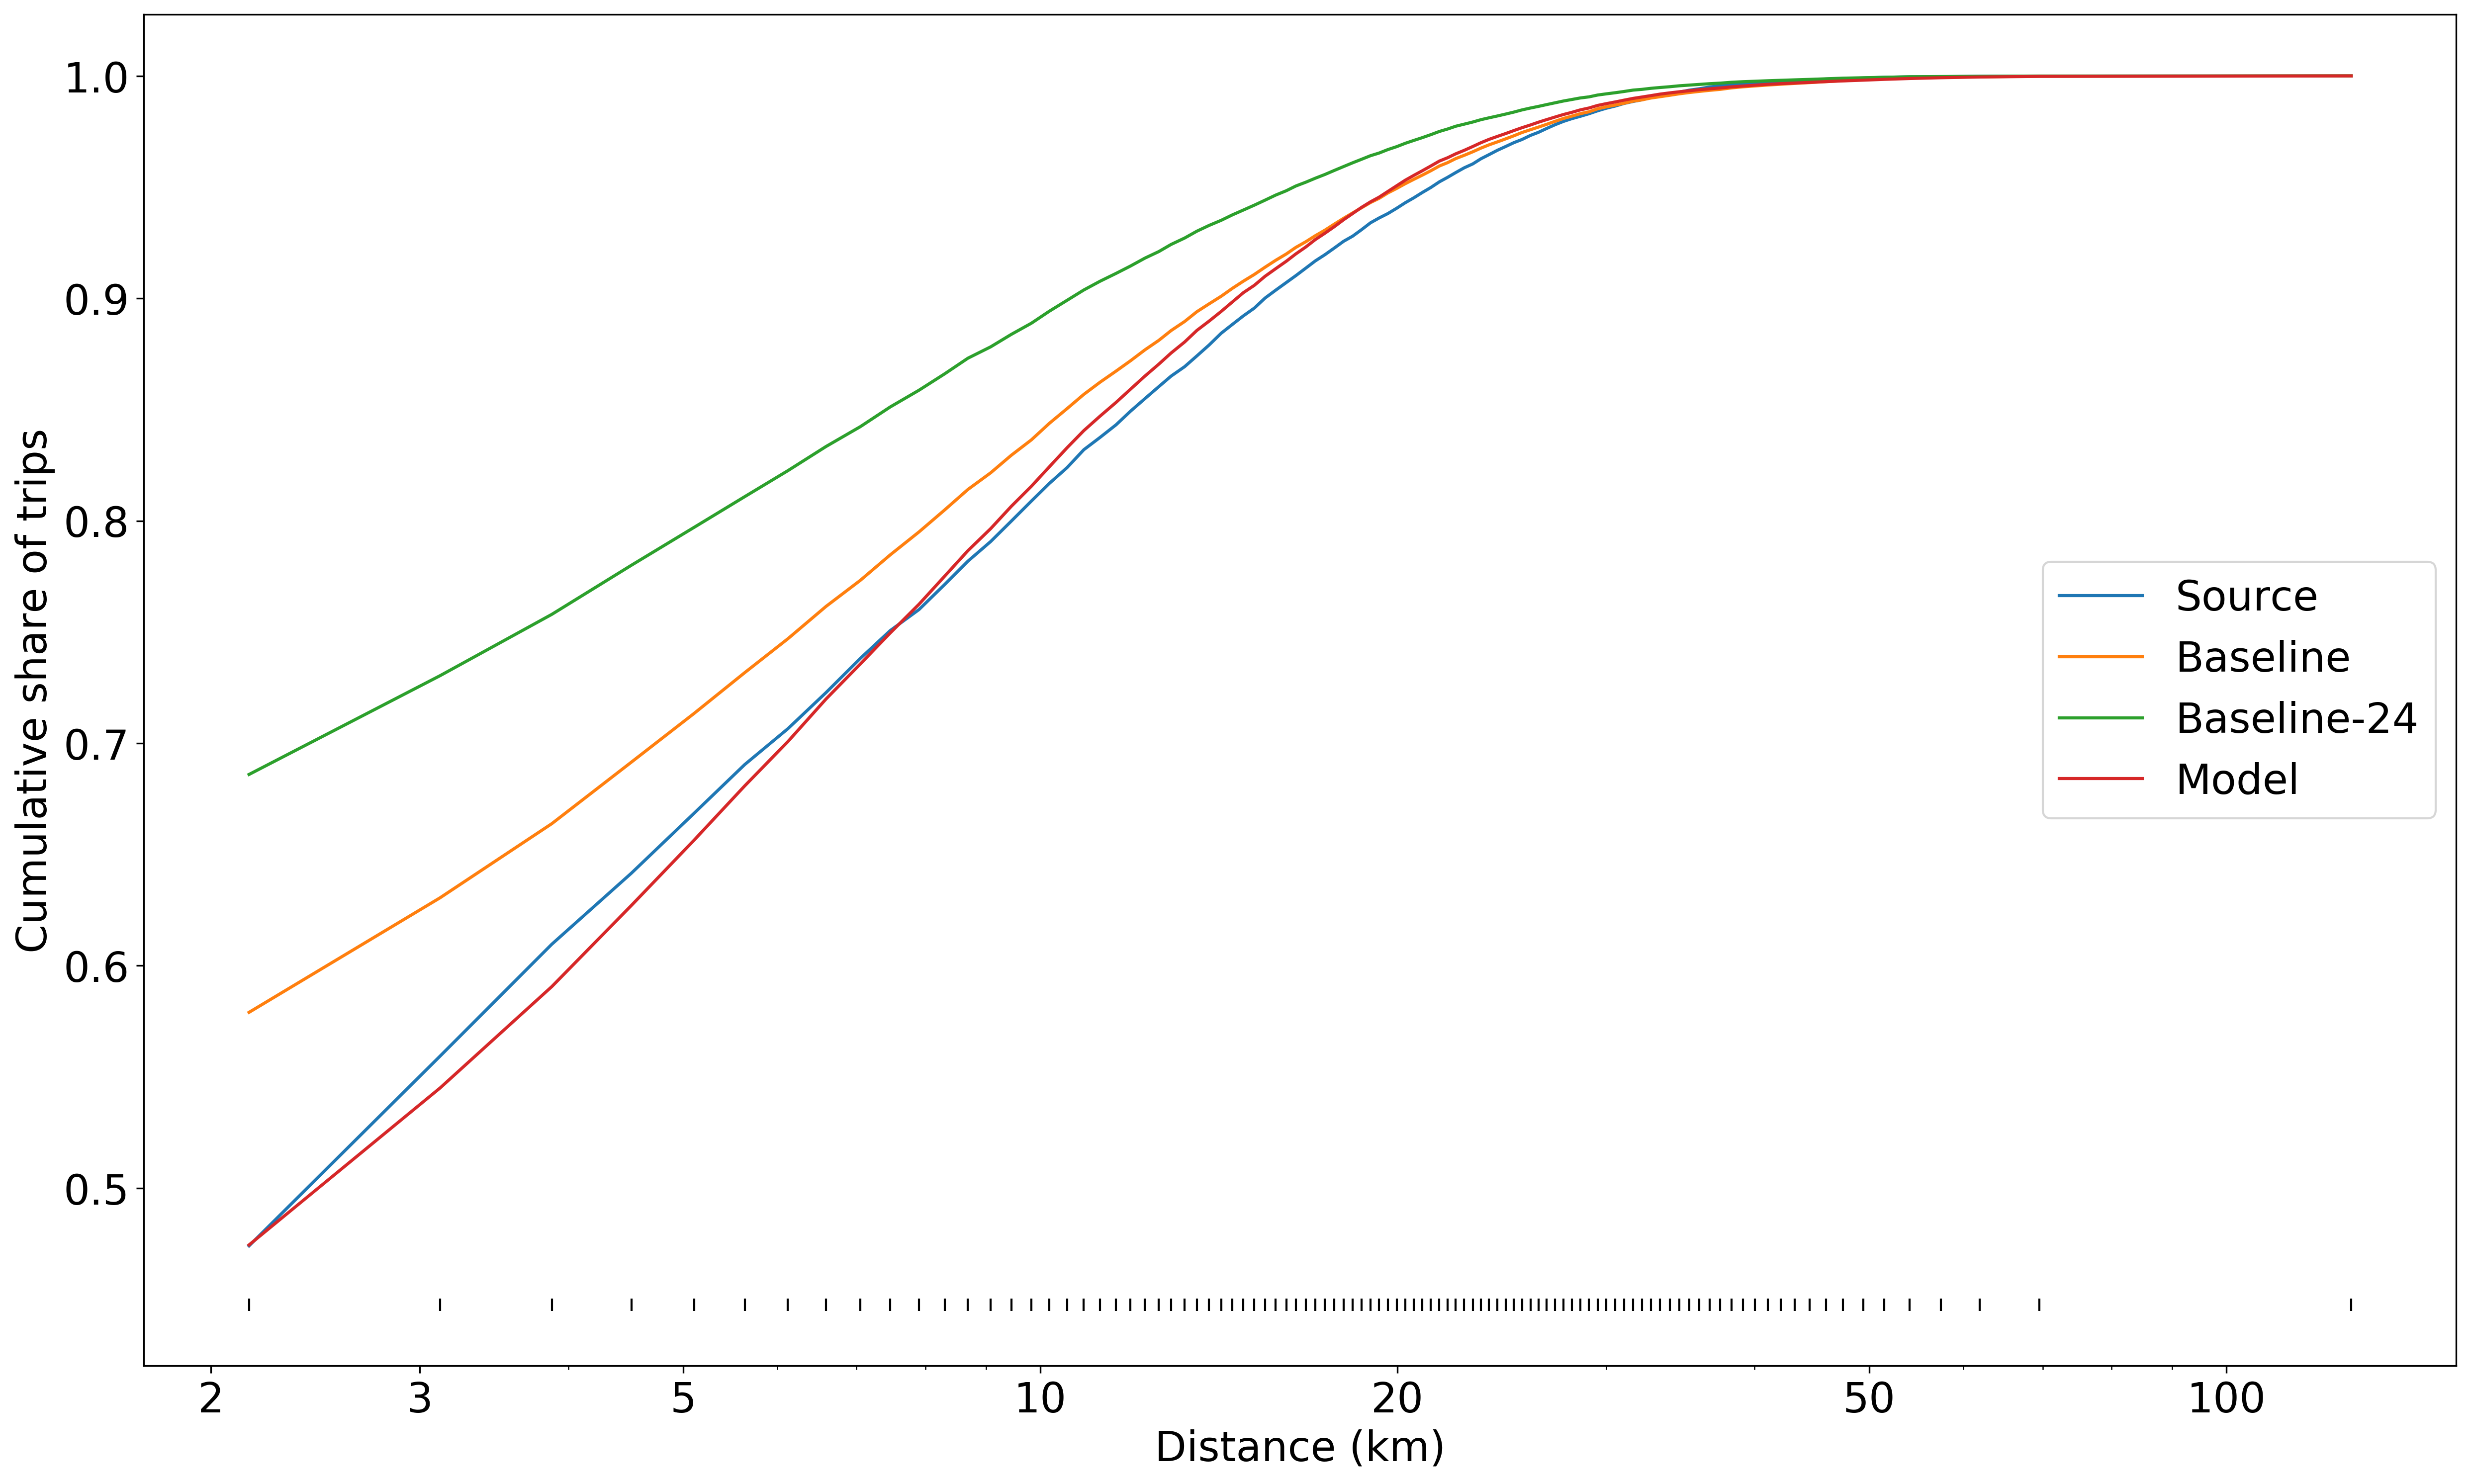

In [40]:
plot("saopaulo", include_model=True, figsize=(20,12))

MSE: 6.32814e-06


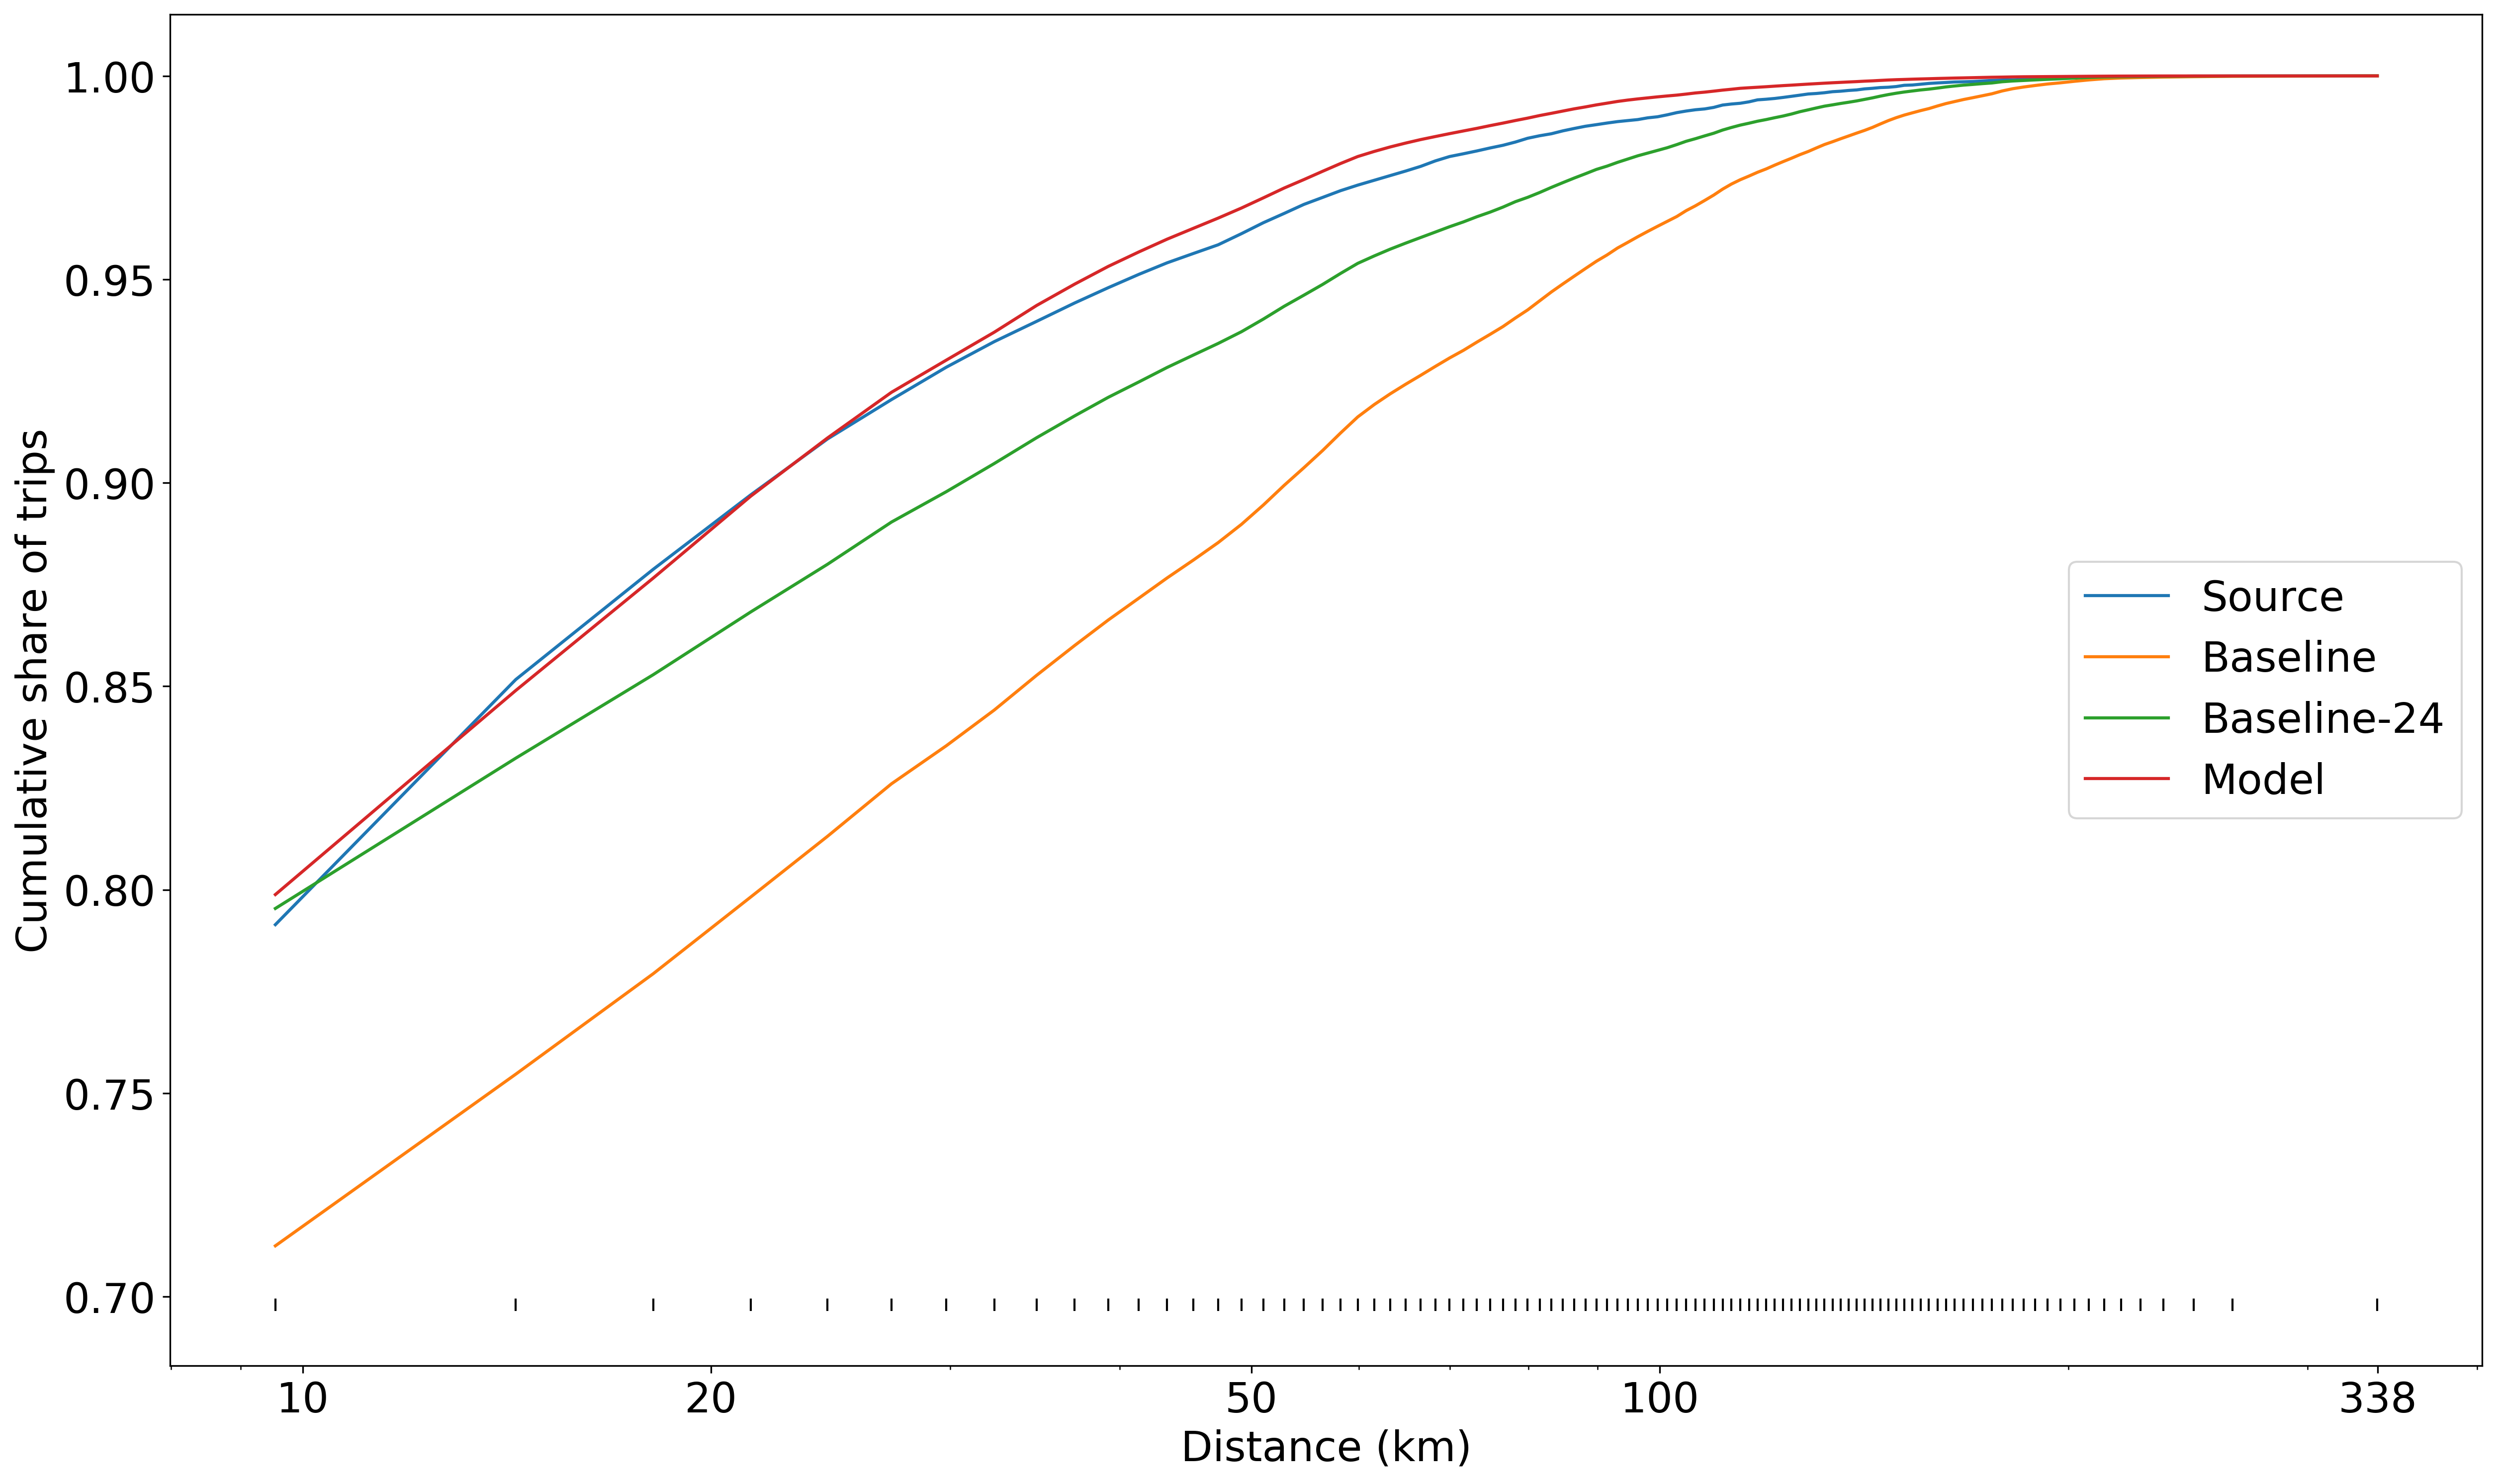

In [11]:
plot("netherlands", include_model=True, figsize=(20,12))

# Sweden

national
east
west


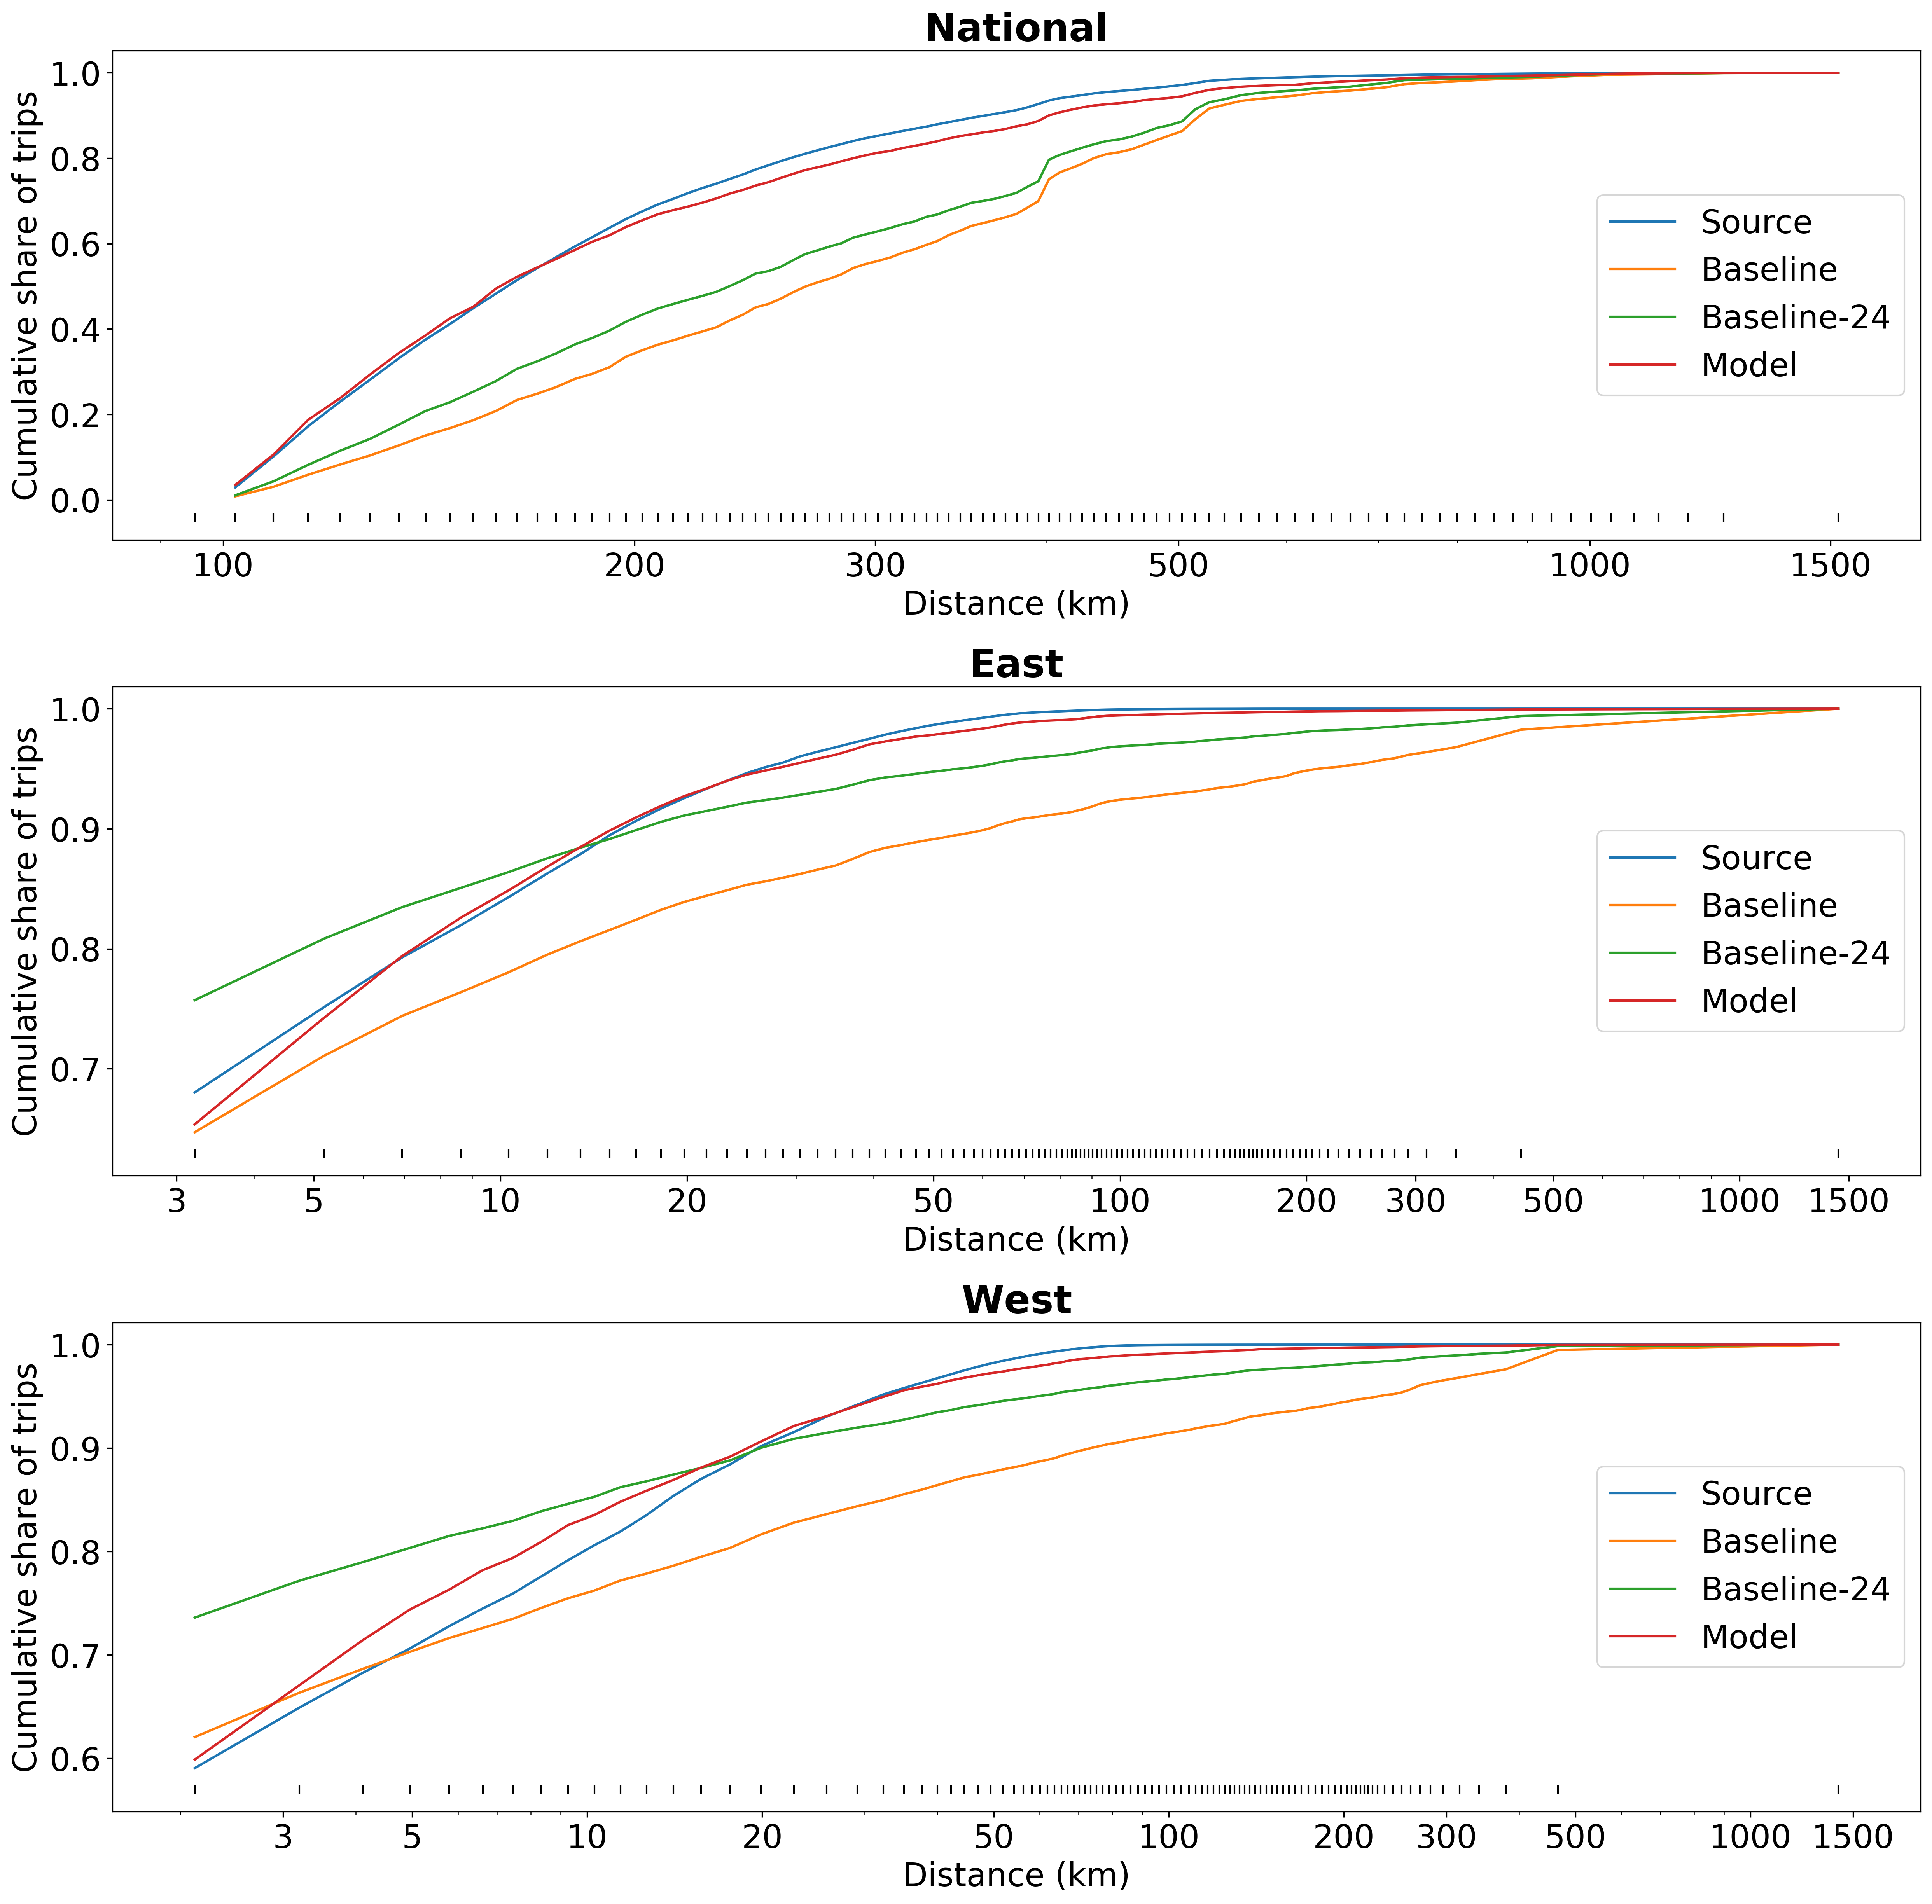

In [51]:
plot_sweden(include_model=True, allinone=True, figsize=(20,20))